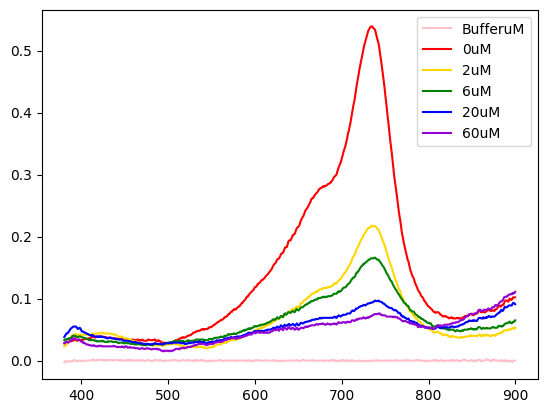

In [20]:
Files = ['A.txt','B.txt','C.txt','D.txt','E.txt','F.txt']
mycolors = ['pink','red', 'gold', 'green', 'blue', 'darkviolet']
titles = ['Buffer','0','2','6','20','60']
for i,color,title in zip(Files,mycolors,titles):
    twolist = np.loadtxt(i)
    x = twolist[:,0]
    y = twolist[:,1]
    plt.plot(x,y,color=color,label=f'{title}uM')
    
plt.legend();

The value of Ka equals 114.74675164609495 1/M*s


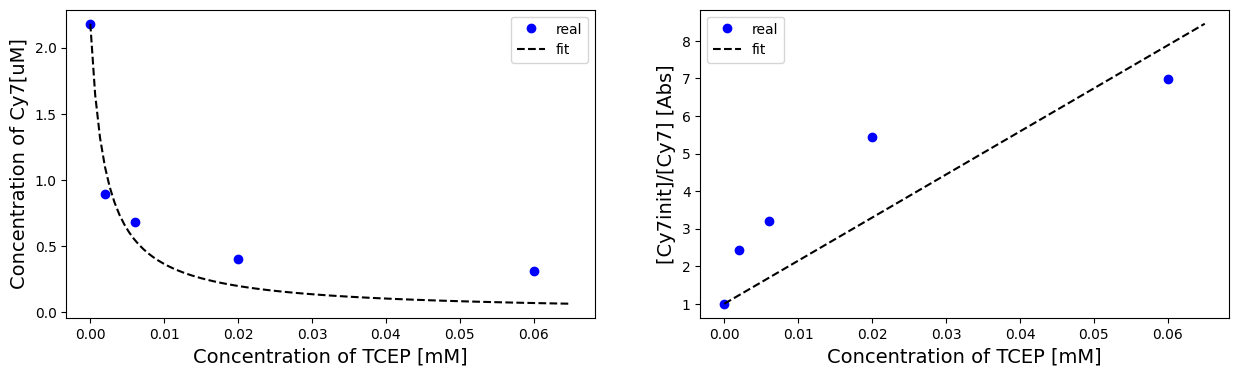

In [19]:
#I don't understand this relationship, because we're taking Cy7 conc at eq and 
#comparing it to TCEP conc found before relation start

# 1 import what I need
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 2 gather initial data
Peaks_old = [0.524,0.215,0.164,0.096,0.075] #ydata for normal
Cy7concs = [2.18,.896,.683,.4,.3125] #in uM
Ts_old = [0,2,6,20,60] #xdata for normal in mM
Ts = [0,0.002,0.006,0.02,0.06] #xdata in Molar
Cin_old = 0.524 # Cy7initial absorption
Cinconc = 2.18 #also in uM

y = []
for i in Cy7concs:
    temp = Cinconc/i
    y.append(temp) #This gets us our ydata for linearized fit
xfit = np.linspace(0,.065,100) #This serves as xdata for both fits


# 3 Below this we define our functions that will be used to find fits
def decay(T,Ka):
    return Cinconc/(Ka*T+1) #this is the original function


def line(T,Ka):
    return Ka*T+1 #this defines the mx+b porion

# 4 Now we find our fit data
mb, error = curve_fit(decay, xdata=Ts, ydata=Cy7concs, p0=[0])
yfitdecay = decay(xfit,mb[0])


mb, error = curve_fit(line, xdata=Ts, ydata=y, p0=[100]) #this takes in the mx+b, x, and y data and returns Ka as mb
yfitline = line(xfit,mb[0]) #this uses Ka and mx+b to take more x values and generate a bunch of y values as a fit

# 5 Now we plot the data of fit and raw data
fs = 14
# normal

plt.figure(figsize=(15,4))
ax1 = plt.subplot(1,2,1)
plt.plot(Ts, Cy7concs,'bo', label='real') #This should be the real data of Ts and Peaks
plt.plot(xfit,yfitdecay,'k--',label='fit')
plt.xlabel('Concentration of TCEP [mM]',{'fontsize':fs})
plt.ylabel('Concentration of Cy7[uM]',{'fontsize':fs})
plt.legend(loc='upper right')

# linearized
ax2 = plt.subplot(1,2,2)
plt.plot(Ts, y,'bo',label='real')
plt.plot(xfit,yfitline,'k--',label='fit') #This should be the xfit data and yfit data
plt.xlabel('Concentration of TCEP [mM]',{'fontsize':fs})
plt.ylabel('[Cy7init]/[Cy7] [Abs]',{'fontsize':fs})
plt.legend(loc='upper left');

print(f'The value of Ka equals {mb[0]} 1/M*s')

the kval is 0.06984893067637128 s^-1


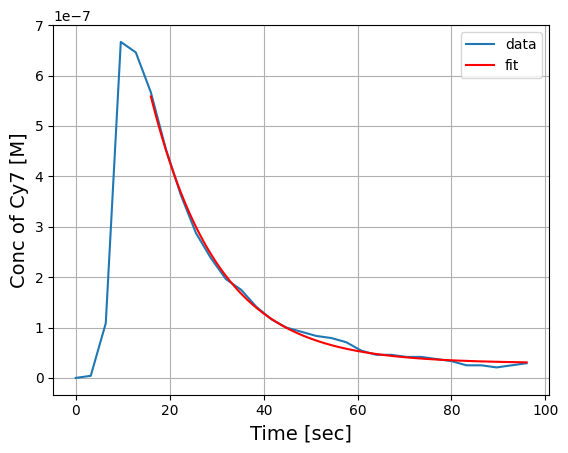

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1 Load data
data = np.loadtxt("C2.txt")
x = data[:,0]
y = [] #this is in M
y1 = data[:,1]
y2 = y1 - np.min(y1)
for i in y2:
    new = i/(240000)
    y.append(new)
    
xpiece = x[5:]
ypiece = y[5:]

# 2 function
def reverse(t, A0, Aeq, k):
    return Aeq + (A0 - Aeq)*np.exp(-k*t)

# Initial guesses. [0]should be closest to A0 and [-1] should be closest to Aeq as time progresses. 
# The k constant will likely be small bc it takes a lot of time for this to decay
p0 = [ypiece[0], ypiece[-1], 0.01]

# 3 Fit
mb, error = curve_fit(reverse, xdata=xpiece, ydata=ypiece, p0=p0)
print(f'the kval is {mb[2]} s^-1')

# 4 Produce fitted curve
xfit = np.linspace(xpiece[0], xpiece[-1], 200)
yfit = reverse(xfit, mb[0],mb[1],mb[2])

# 5 Plot
fs = 14
plt.plot(x, y, label="data")
plt.plot(xfit, yfit, "r-", label="fit")
plt.grid(True)
plt.ylabel('Conc of Cy7 [M]',{'fontsize':fs})
plt.xlabel('Time [sec]',{'fontsize':fs})
plt.legend()
plt.show()

the kval is 0.18120290751766002 s^-1


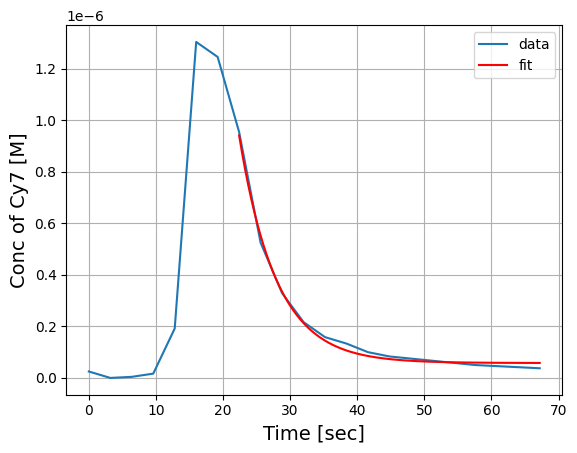

In [22]:
# from 7 to 21

# 1 Load data
data = np.loadtxt("D2.txt")
x = data[:,0]
y = []
y1 = data[:,1]
y2 = y1 - np.min(y1)
for i in y2:
    new = i/(240000)
    y.append(new)
    
xpiece = x[7:]
ypiece = y[7:]

# 2 function
def reverse(t, A0, Aeq, k):
    return Aeq + (A0 - Aeq)*np.exp(-k*t)

# Initial guesses
p0 = [ypiece[0], ypiece[-1], 0.01]

# 3 Fit
mb, error = curve_fit(reverse, xdata=xpiece, ydata=ypiece, p0=p0)
print(f'the kval is {mb[2]} s^-1')

# 4 Produce fitted curve
xfit = np.linspace(xpiece[0], xpiece[-1], 200)
yfit = reverse(xfit, mb[0],mb[1],mb[2])

# 5 Plot
fs = 14
plt.plot(x, y, label="data")
plt.plot(xfit, yfit, "r-", label="fit")
plt.grid(True)
plt.ylabel('Conc of Cy7 [M]',{'fontsize':fs})
plt.xlabel('Time [sec]',{'fontsize':fs})
plt.legend()
plt.show()

the kval is 0.4434300634924296 s^-1


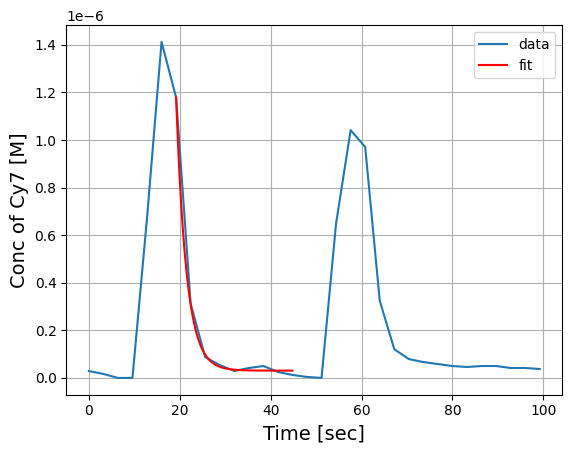

In [23]:
# from 7 to 23
# 1 Load data
data = np.loadtxt("E2.txt")
x = data[:,0]
y = []
y1 = data[:,1]
y2 = y1 - np.min(y1)
for i in y2:
    new = i/(240000)
    y.append(new)
    
xpiece = x[6:15]
ypiece = y[6:15]

# 2 function
def reverse(t, A0, Aeq, k):
    return Aeq + (A0 - Aeq)*np.exp(-k*t)

# Initial guesses
p0 = [ypiece[0], ypiece[-1], 0.02]

# 3 Fit
mb, error = curve_fit(reverse, xdata=xpiece, ydata=ypiece, p0=p0)
print(f'the kval is {mb[2]} s^-1')

# 4 Produce fitted curve
xfit = np.linspace(xpiece[0], xpiece[-1], 200)
yfit = reverse(xfit, mb[0],mb[1],mb[2])

# 5 Plot
fs = 14
plt.plot(x, y, label="data")
plt.plot(xfit, yfit, "r-", label="fit")
plt.grid(True)
plt.ylabel('Conc of Cy7 [M]',{'fontsize':fs})
plt.xlabel('Time [sec]',{'fontsize':fs})
plt.legend()
plt.show()

the kval is 0.7969206424903467 s^-1


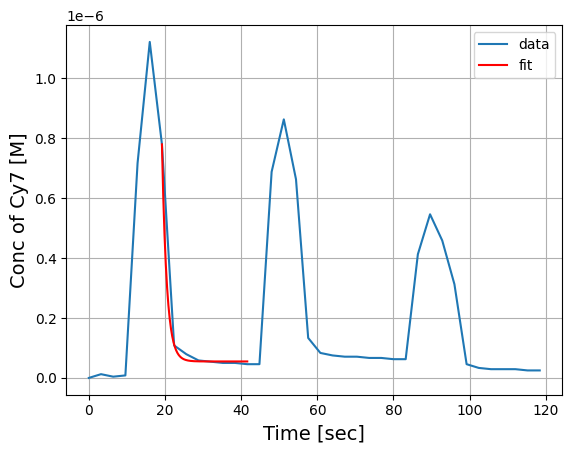

In [24]:
# from 17 to 22
# 1 Load data
data = np.loadtxt("F2.txt")
x = data[:,0]
y = []
y1 = data[:,1]
y2 = y1 - np.min(y1)
for i in y2:
    new = i/(240000)
    y.append(new)
    
xpiece = x[6:14]
ypiece = y[6:14]

# 2 function
def reverse(t, A0, Aeq, k):
    return Aeq + (A0 - Aeq)*np.exp(-k*t)

# Initial guesses
p0 = [ypiece[0], ypiece[-1], 0.02]

# 3 Fit
mb, error = curve_fit(reverse, xdata=xpiece, ydata=ypiece, p0=p0)
print(f'the kval is {mb[2]} s^-1')

# 4 Produce fitted curve
xfit = np.linspace(xpiece[0], xpiece[-1], 200)
yfit = reverse(xfit, mb[0],mb[1],mb[2])

# 5 Plot
fs = 14
plt.plot(x, y, label="data")
plt.plot(xfit, yfit, "r-", label="fit")
plt.grid(True)
plt.ylabel('Conc of Cy7 [M]',{'fontsize':fs})
plt.xlabel('Time [sec]',{'fontsize':fs})
plt.legend()
plt.show()

12.536206896551727
Our estimated k1, and k2 values from our pseudo-first order decay curves are 11.93 1/Ms and 0.11 1/s
from this, our Ka value should be k1/k2 = 108.09 1/M


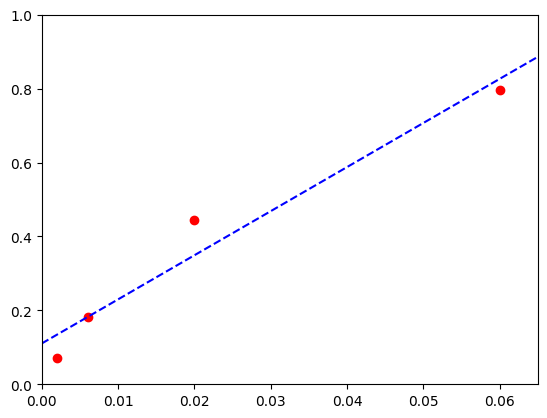

In [25]:
#this is a plot of y = mx (over a domain!). The reason there isn't a +b is because it does actually go to zero very near the origin 
#because at small concentrations the way the graph acts shifts from a first order to second order function as the [T] begins to
#matter as much as the [Cy7]. So, because of this y = mx relation, our y(aka k-star) values, x(aka Tconc) values, and the 
#knowledge of pseudo-first order rxns operating as k-star*[Cy7] therefore k-star = k*[T], we can find k1 from the slope of 
#this graph of k-star and [T] data!
#Explaining the +b. My previous explanation was incomplete, the b is representative of k2 or k1^-1. Why is this? well when finding k observed, 
#we're dependent on the whole eq Rate = -k1[T][Cy7] + k2[P]. k-star is k1*[T] assuming [T] is large yes, but it has k2 added onto it as part of the
#derived decay function, found by deriving this above rate function to get Aeq + (A0-Aeq)*e^((k1+k2)*t). with the (k1+k2)*t being our decay function!

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

ks = [0.0698,0.1812,0.4434,0.7969]
Tcep = [.002,.006,.020,.060] # concentration in M
m = (ks[-1]-ks[0])/(Tcep[-1]-Tcep[0]) #estimation of what k1 should be in 1/Ms
print(m)

xfit = np.linspace(0,60,100)
def line(x,m,b):
    return m*x+b
mb,error = curve_fit(line,xdata=Tcep,ydata=ks,p0=[10,.015])
yfit = line(xfit,mb[0],mb[1])

k1 = mb[0]
k2 = mb[1]
print(f'Our estimated k1, and k2 values from our pseudo-first order decay curves are {k1:.2f} 1/Ms and {k2:.2f} 1/s') #curve_fit estimation of what k1 should be in 1/Ms
print(f'from this, our Ka value should be k1/k2 = {k1/k2:.2f} 1/M')

plt.plot(Tcep,ks,'ro')
plt.plot(xfit,yfit,'b--')
plt.xlim(0,.065)
plt.ylim(0,1);

Our Ka found via spectroscopy of differing concentrations of [Cy7]eq was 114.75 1/M.  
  
Our Ka found via rate of decay of [Cy7] in pseudo-first order forward rxn was 108.09 1/M  
  
Our error is estimated to be approximately 6%